# Example 2: Use of I2EM

## 1. Requirements

- Installation of SenSE

## 2. I2EM for different incidence angles

First of all, we need to import several packages

In [1]:
# import packages
#--------------------
import sense
import sys
import os
import numpy as np
from sense.surface import I2EM
import matplotlib.pyplot as plt
import time

The RT model output is backscatter in linear units. For visualization purposes the backscatter is usually displayed in decibel (dB). Thus the following helper function is defined  

In [2]:
# Helper function
#------------------
def db(x):
    return 10.*np.log10(x)

Further, we need to define surface model input parameters

In [3]:
# Input data for RT surface model Oh04
#--------------------------------------
theta_deg = np.linspace(0.,70., 71)
theta = np.deg2rad(theta_deg) # incidence angle [radians]

eps = 11.3-1.5j # dielectric constant
f = 3. # frequency [GHz]

s = 1./100. # surface roughness [m]
l = 10./100. # correlation length [m]

Initialize and run the I2EM RT model

In [4]:
hh1=[]
hh2=[]
vv1=[]
vv2=[]
hv1=[]
hv2=[]
xpol = True
auto=False
for t in theta:
    print(t)
    I1 = I2EM(f, eps, s, l, t, acf_type='gauss', xpol=xpol, auto=auto)
    I2 = I2EM(f, eps, s, l, t, acf_type='exp15', xpol=xpol, auto=auto)
    print(I1.ks, I1.kl)
    hh1.append(I1.hh)
    hh2.append(I2.hh)
    vv1.append(I1.vv)
    vv2.append(I2.vv)
    if xpol:
        hv1.append(I1.hv)
        hv2.append(I2.hv)

hh1 = np.array(hh1)
hh2 = np.array(hh2)
vv1 = np.array(vv1)
vv2 = np.array(vv2)
hv1 = np.array(hv1)
hv2 = np.array(hv2)

0.0


/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/i2em.py:376: RuntimeWarning: divide by zero encountered in double_scalars
  ct = np.cos(self.theta)/np.sin(self.theta)
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/i2em.py:377: RuntimeWarning: divide by zero encountered in double_scalars
  cts = np.cos(self.thetas)/np.sin(self.thetas)
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/i2em.py:367: RuntimeWarning: divide by zero encountered in double_scalars
  ct = np.cos(self.theta)/np.sin(self.theta)


0.0007870779703274001


/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/i2em.py:376: RuntimeWarning: divide by zero encountered in double_scalars
  ct = np.cos(self.theta)/np.sin(self.theta)
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/i2em.py:377: RuntimeWarning: divide by zero encountered in double_scalars
  cts = np.cos(self.thetas)/np.sin(self.thetas)
/home/tweiss/anaconda3/envs/sense/lib/python3.10/site-packages/sense-0.1-py3.10.egg/sense/surface/i2em.py:367: RuntimeWarning: divide by zero encountered in double_scalars
  ct = np.cos(self.theta)/np.sin(self.theta)


0.001217568974107298
0.6287535065855046 6.287535065855046
0.017453292519943295
0.0007833912328427959
0.0012172347989278089
0.6287535065855046 6.287535065855046
0.03490658503988659
0.0007724472676413573
0.0012162267716881322
0.6287535065855046 6.287535065855046
0.05235987755982989
0.0007545881118301572
0.001214529526372035
0.6287535065855046 6.287535065855046
0.06981317007977318
0.0007303620486923847
0.0012121208734153861
0.6287535065855046 6.287535065855046
0.08726646259971647
0.0007004929128896699
0.0012089758043466103
0.6287535065855046 6.287535065855046
0.10471975511965978
0.000665840805000718
0.0012050703982415306
0.6287535065855046 6.287535065855046
0.12217304763960307
0.0006273573948793677
0.0012003848430994532
0.6287535065855046 6.287535065855046
0.13962634015954636
0.0005860392756843343
0.0011949052321223563
0.6287535065855046 6.287535065855046
0.15707963267948966
0.0005428826920074877
0.0011886241864850497
0.6287535065855046 6.287535065855046
0.17453292519943295
0.000498842610

Visualization

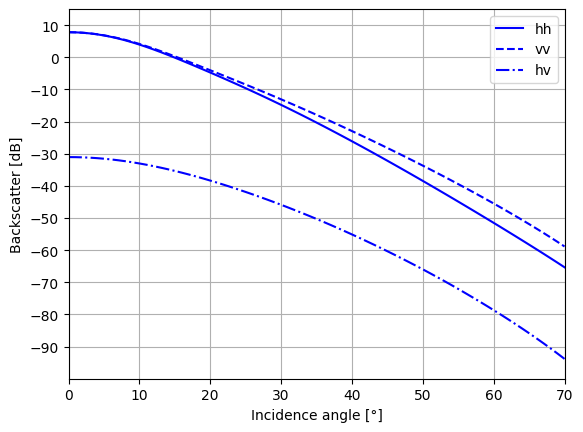

In [5]:
f = plt.figure()
ax = f.add_subplot(111)

# ax.plot(theta_deg, db(hh2), color='red', label='hh')
ax.plot(theta_deg, db(hh1), color='blue', label='hh')

# ax.plot(theta_deg, db(vv2), color='red', label='vv', linestyle='--')
ax.plot(theta_deg, db(vv1), color='blue', label='vv', linestyle='--')

# ax.plot(theta_deg, db(hv2), color='red', label='hv', linestyle='-.')
ax.plot(theta_deg, db(hv1), color='blue', label='hv', linestyle='-.')

ax.grid()
ax.set_xlim(0.,70.)
ax.set_ylim(-100.,15.)
ax.set_yticks(np.arange(-90, 20, 10))
plt.ylabel('Backscatter [dB]')
plt.xlabel('Incidence angle [°]')
plt.legend()
plt.show()